In [16]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix


In [5]:
train = pd.read_csv("train.csv")



In [6]:
print("Train size: {}". format(len(train)))
print(train.head())

Train size: 42000
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0 

In [7]:
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)
print(X.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

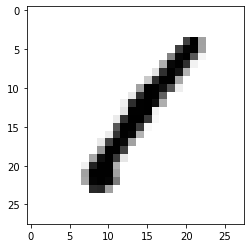

Label: 1


In [8]:
plt.imshow(X.values[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(Y[0]))

In [9]:
x = X.values.reshape(42000, 784)

x = x.astype('float32')
x /= 255

print(x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
num_classes = 10

y = keras.utils.to_categorical(Y, num_classes)
print(y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=9)
print('Length of Train: {}'.format(len(x_train)))
print('Length of Validation: {}'.format(len(x_val)))

Length of Train: 33600
Length of Validation: 8400


In [21]:
model = Sequential()

model.add(Dense(350, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 350)               274750    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                17550     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 292,810
Trainable params: 292,810
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
# Treina com os parte dos dados
batch_size = 250
epochs = 30

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 2s 48us/sample - loss: 0.4431 - accuracy: 0.8749 - val_loss: 0.2182 - val_accuracy: 0.9398
Epoch 2/30
33600/33600 [==============================] - 1s 30us/sample - loss: 0.1691 - accuracy: 0.9506 - val_loss: 0.1635 - val_accuracy: 0.9536
Epoch 3/30
33600/33600 [==============================] - 1s 30us/sample - loss: 0.1180 - accuracy: 0.9652 - val_loss: 0.1344 - val_accuracy: 0.9614
Epoch 4/30
33600/33600 [==============================] - 1s 31us/sample - loss: 0.0880 - accuracy: 0.9735 - val_loss: 0.1214 - val_accuracy: 0.9646
Epoch 5/30
33600/33600 [==============================] - 1s 30us/sample - loss: 0.0651 - accuracy: 0.9813 - val_loss: 0.1128 - val_accuracy: 0.9654
Epoch 6/30
33600/33600 [==============================] - 1s 38us/sample - loss: 0.0475 - accuracy: 0.9862 - val_loss: 0.1044 - val_accuracy: 0.9674
Epoch 7/30
33600/33600 [==============================] -

1.0 0.97761905
0.98995835 0.9717738


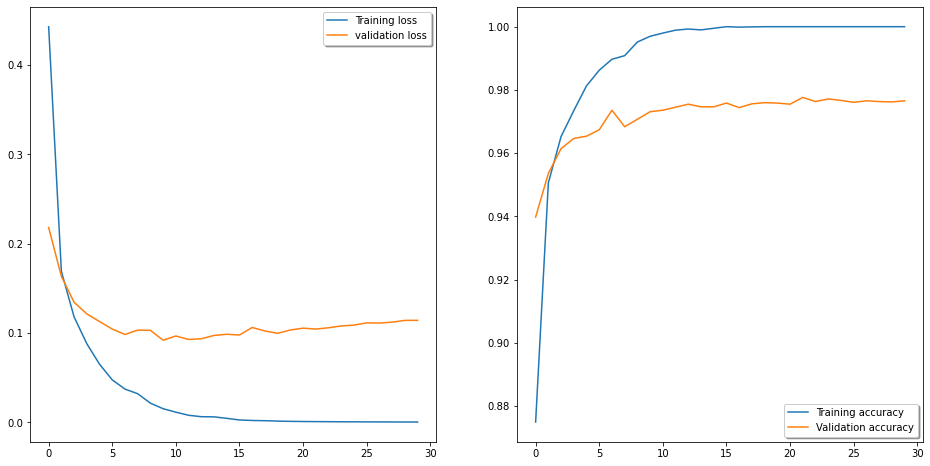

In [26]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], label="Training loss")
ax[0].plot(history.history['val_loss'], label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig('1.png')

print(max(history.history['accuracy']), max(history.history['val_accuracy']))
print(np.mean(history.history['accuracy']), np.mean(history.history['val_accuracy']))

In [27]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.11417685928515614
Test accuracy: 97.65475988388062


In [28]:
y_pred = model.predict_classes(x_val)

import numpy as np
y_test_c = np.argmax(y_val, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test_c, y_pred))
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_c, y_pred, target_names=target_names))

Confusion Matrix
[[792   0   1   1   0   2   3   1   1   0]
 [  0 955   4   3   2   0   0   3   1   0]
 [  2   3 809   4   1   1   0   5   3   1]
 [  0   0   3 862   1  12   0   2   2   3]
 [  0   3   1   0 791   0   2   1   2   8]
 [  4   0   1   8   0 745   2   0   3   4]
 [  4   2   2   0   2   5 785   0   3   0]
 [  1   5   3   0   2   0   1 835   4   4]
 [  6   3   1   3   4   3   2   1 806   6]
 [  4   0   0   3  11   0   0   6   2 823]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       801
           1       0.98      0.99      0.99       968
           2       0.98      0.98      0.98       829
           3       0.98      0.97      0.97       885
           4       0.97      0.98      0.98       808
           5       0.97      0.97      0.97       767
           6       0.99      0.98      0.98       803
           7       0.98      0.98      0.98       855
           8       0.97      0.97      0.97